# EMPLOYEE TURNOVER PREDICTION USING SUPPORT VECTOR MACHINe

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


 Loading Dataset

In [40]:
df = pd.read_csv("dataset.csv")
print("Dataset Loaded Successfully")
df.head()
df.info()

Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Encoding Categorical Columns (sales, salary)

In [41]:
cat_cols = df.select_dtypes(include='object').columns
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print("Categorical Columns Encoded Done")

Categorical Columns Encoded Done


VISUALIZATIONS FOR BETTER ANALYSIS

C:\Users\HARSH\AppData\Local\Temp\ipykernel_12580\543794501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['left'], palette="viridis")


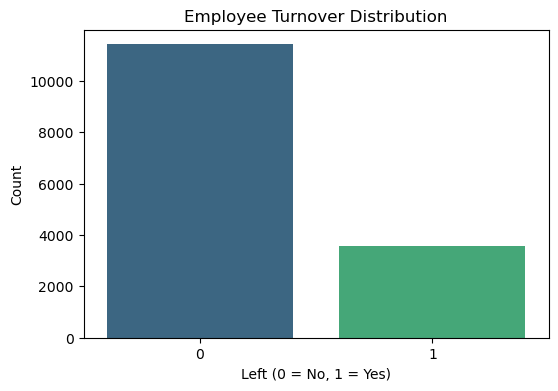

In [42]:
# Turnover Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['left'], palette="viridis")
plt.title("Employee Turnover Distribution")
plt.xlabel("Left (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

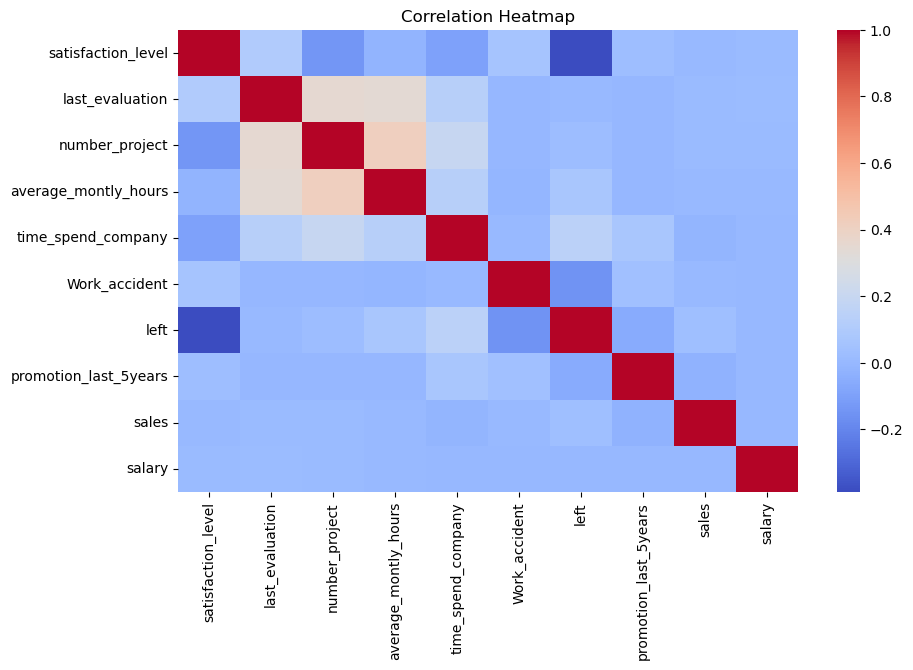

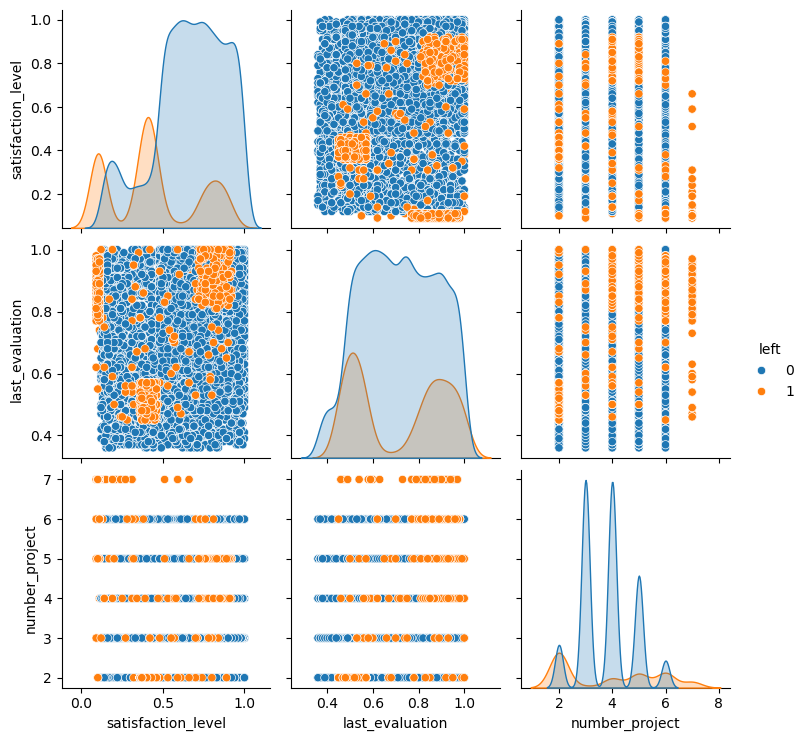

In [43]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(df[['satisfaction_level','last_evaluation','number_project','left']], hue="left")
plt.show()


Feature Selection and Target Column

In [44]:

X = df.drop('left', axis=1)
y = df['left']


Feature Scaling

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Test Spliting

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Train-Test Split Done ")

Train-Test Split Done 


Training of Our SVM model

In [47]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

print("SVM Model Trained ")

SVM Model Trained 


Prediction and Accuracy of Our Model

In [48]:
pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(f"\nSVM Accuracy: {accuracy * 100:.2f}%")



SVM Accuracy: 95.93%


Confusion Matrix For visulalizations

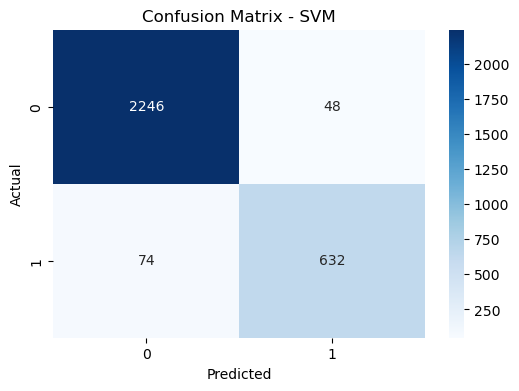

In [49]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Report- classification

In [50]:
print("\nClassification Report:\n")
print(classification_report(y_test, pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.93      0.90      0.91       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



Feature Importancxe (how much each feature contributing to it)

C:\Users\HARSH\AppData\Local\Temp\ipykernel_12580\2106167817.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette="Spectral")


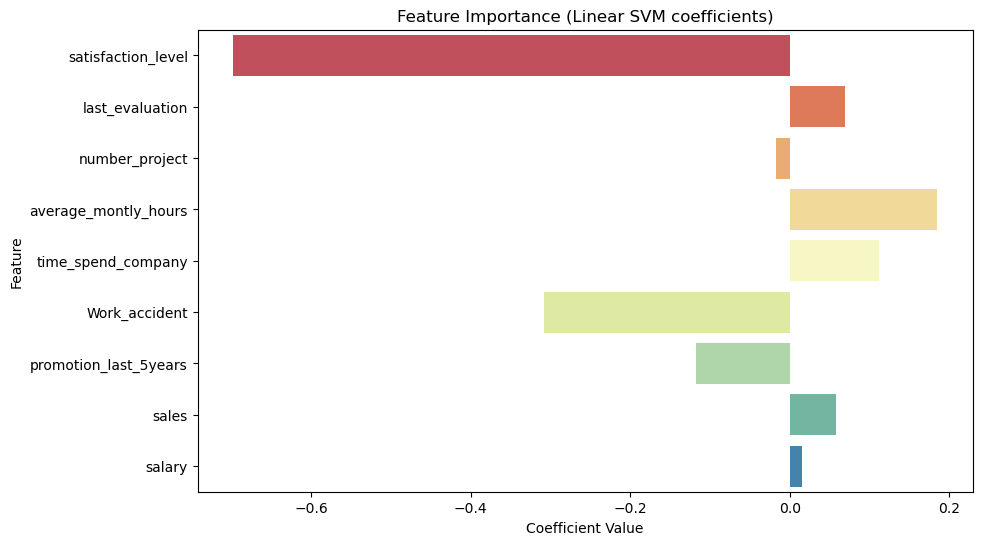

In [51]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

importance = linear_svm.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=feature_names, palette="Spectral")
plt.title("Feature Importance (Linear SVM coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()